In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("allData.pkl","rb") as f:
    data=pickle.load(f)

In [3]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

In [4]:
#View the data
data['GrodanSens']

,%time,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
0,43815.00000,NaN,NaN,NaN,NaN,NaN,NaN
1,43815.00347,NaN,NaN,NaN,NaN,NaN,NaN
2,43815.00694,NaN,NaN,NaN,NaN,NaN,NaN
3,43815.01042,NaN,NaN,NaN,NaN,NaN,NaN
4,43815.01389,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
286849,43980.98611,NaN,NaN,NaN,NaN,NaN,NaN
286850,43980.98958,NaN,NaN,NaN,NaN,NaN,NaN
286851,43980.99306,NaN,NaN,NaN,NaN,NaN,NaN
286852,43980.99653,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#storing files under GrodanSens to g_sens 
g_sens = data['GrodanSens']

In [6]:
#Viewing the shape of data
g_sens.shape

(286854, 7)

In [7]:
#Describing the data
g_sens.describe()

,%time
count,286854.000000
mean,43898.000000
std,47.921158
min,43815.000000
25%,43856.500000
50%,43898.000000
75%,43939.500000
max,43981.000000


In [8]:
#Checking for number of unique data entries in each column
g_sens.nunique()

%time       47809
EC_slab1       53
EC_slab2       55
WC_slab1      451
WC_slab2      525
t_slab1       201
t_slab2       197
dtype: int64

In [9]:
#Checking for unique data entries in each column
for col in g_sens.columns:
    print('{} : {}'.format(col,g_sens[col].unique()))

%time : [43815.      43815.00347 43815.00694 ... 43980.99306 43980.99653
 43981.     ]
EC_slab1 : ['  NaN' '  4.4' '  4.6' '  4.5' '  4.7' '  4.8' '  4.9' '  5.0' '  5.1'
 '  5.2' '  5.3' '  5.4' '  5.5' '  5.6' '  5.7' '  5.8' '  5.9' '  6.0'
 '  6.1' '  6.2' '  6.3' '  4.3' '  6.4' '  6.5' '  6.6' '  6.7' '  6.8'
 '  6.9' '  7.0' '  7.1' '  7.2' '  7.3' '  7.4' '  7.5' '  4.2' '  4.1'
 '  4.0' '  0.0' '  7.6' '  7.7' '  7.8' '  7.9' '  8.0' '  8.1' '  8.2'
 '  3.9' '  3.8' '  3.7' '  3.6' '  3.5' '  3.4' '  3.3' '  3.2']
EC_slab2 : ['  NaN' '  4.7' '  4.8' '  4.9' '  5.0' '  4.6' '  4.5' '  4.4' '  4.3'
 '  4.2' '  4.1' '  5.1' '  5.2' '  4.0' '  3.9' '  5.3' '  5.4' '  5.5'
 '  5.6' '  5.7' '  5.8' '  5.9' '  6.0' '  6.1' '  6.2' '  6.3' '  6.4'
 '  6.5' '  6.6' '  6.7' '  6.8' '  6.9' '  7.0' '  7.1' '  7.2' '  7.3'
 '  7.4' '  7.5' '  7.6' '  7.7' '  7.8' '  7.9' '  8.0' '  8.1' '  0.0'
 '  8.2' '  8.3' '  8.4' '  8.5' '  8.6' '  3.8' '  3.7' '  3.6' '  3.5'
 '  3.4']
WC_slab1 : [

In [10]:
#Checking the data type of each column
g_sens.dtypes

%time       float64
EC_slab1     object
EC_slab2     object
WC_slab1     object
WC_slab2     object
t_slab1      object
t_slab2      object
dtype: object

In [11]:
#Displaying all the column headings
g_sens.columns

Index(['%time', 'EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1',
       't_slab2'],
      dtype='object')

In [12]:
#Renaming
g_sens.rename(columns={"%time": "Time"}, inplace=True)

In [13]:
#View the data
g_sens.head()

,Time,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
0,43815.00000,NaN,NaN,NaN,NaN,NaN,NaN
1,43815.00347,NaN,NaN,NaN,NaN,NaN,NaN
2,43815.00694,NaN,NaN,NaN,NaN,NaN,NaN
3,43815.01042,NaN,NaN,NaN,NaN,NaN,NaN
4,43815.01389,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#changing time to its standard format 
g_sens['Time'] = pd.to_datetime(g_sens['Time'], unit='D', origin='1899-12-30')

In [15]:
#View the data
g_sens.head()

,Time,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
0,2019-12-16 00:00:00.000000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-16 00:04:59.808000256,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-16 00:09:59.616000000,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-16 00:15:00.288000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-16 00:20:00.096000256,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Checking for Null values in the data
g_sens.isnull()

,Time,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
286849,False,False,False,False,False,False,False
286850,False,False,False,False,False,False,False
286851,False,False,False,False,False,False,False
286852,False,False,False,False,False,False,False


In [17]:
#Checking for the sum of the null values in the data
g_sens.isnull().sum()

Time        0
EC_slab1    0
EC_slab2    0
WC_slab1    0
WC_slab2    0
t_slab1     0
t_slab2     0
dtype: int64

In [18]:
#Getting all the column headings in a list
list(g_sens.columns.values)

['Time', 'EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1', 't_slab2']

In [19]:
#Storing all the listed column headings excluding 'Time' in  a variable 
list_g_sens=list(g_sens.columns.values)
list_g_sens.remove('Time')

In [20]:
#Converting all the int data types to float 
for i in list_g_sens:
    g_sens[i] = g_sens[i].astype(float)

In [21]:
#Printing data types of each column
g_sens.dtypes

Time        datetime64[ns]
EC_slab1           float64
EC_slab2           float64
WC_slab1           float64
WC_slab2           float64
t_slab1            float64
t_slab2            float64
dtype: object

In [22]:
#Finding Correlation
correlation=g_sens.corr()
correlation

,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
EC_slab1,1.000000,0.764555,0.267132,0.202853,0.010545,0.005618
EC_slab2,0.764555,1.000000,0.333972,0.108769,-0.019684,-0.007208
WC_slab1,0.267132,0.333972,1.000000,0.613644,-0.003774,-0.005431
WC_slab2,0.202853,0.108769,0.613644,1.000000,0.088179,0.063238
t_slab1,0.010545,-0.019684,-0.003774,0.088179,1.000000,0.991084
t_slab2,0.005618,-0.007208,-0.005431,0.063238,0.991084,1.000000


# Plotting Heat map

<AxesSubplot:>

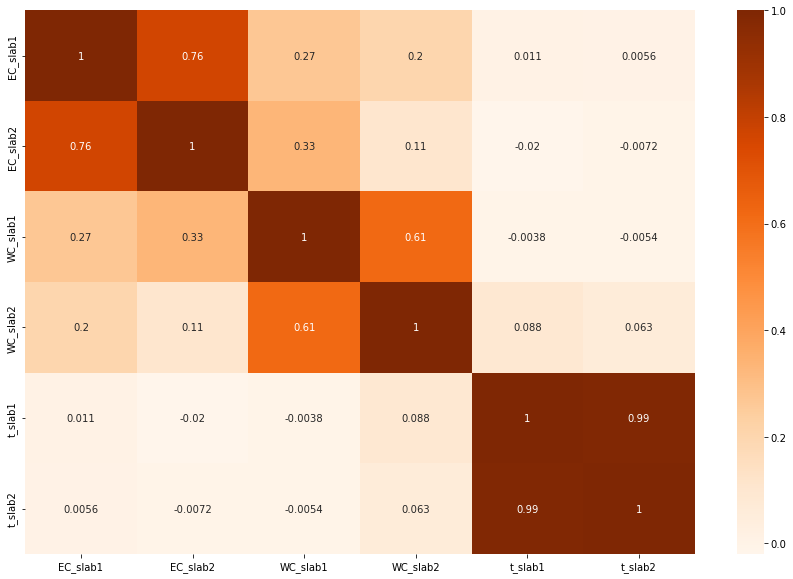

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(g_sens.corr(),cbar=True,annot=True,cmap='Oranges')

# From the Heat Map, we can see that 'EC_slab1' and  'EC_slab2' have strong positive correlation and, 'EC_slab2' and  't_slab2' have strong negative correlation.

# Plotting Pair plot to understand the relationship between column features.¶

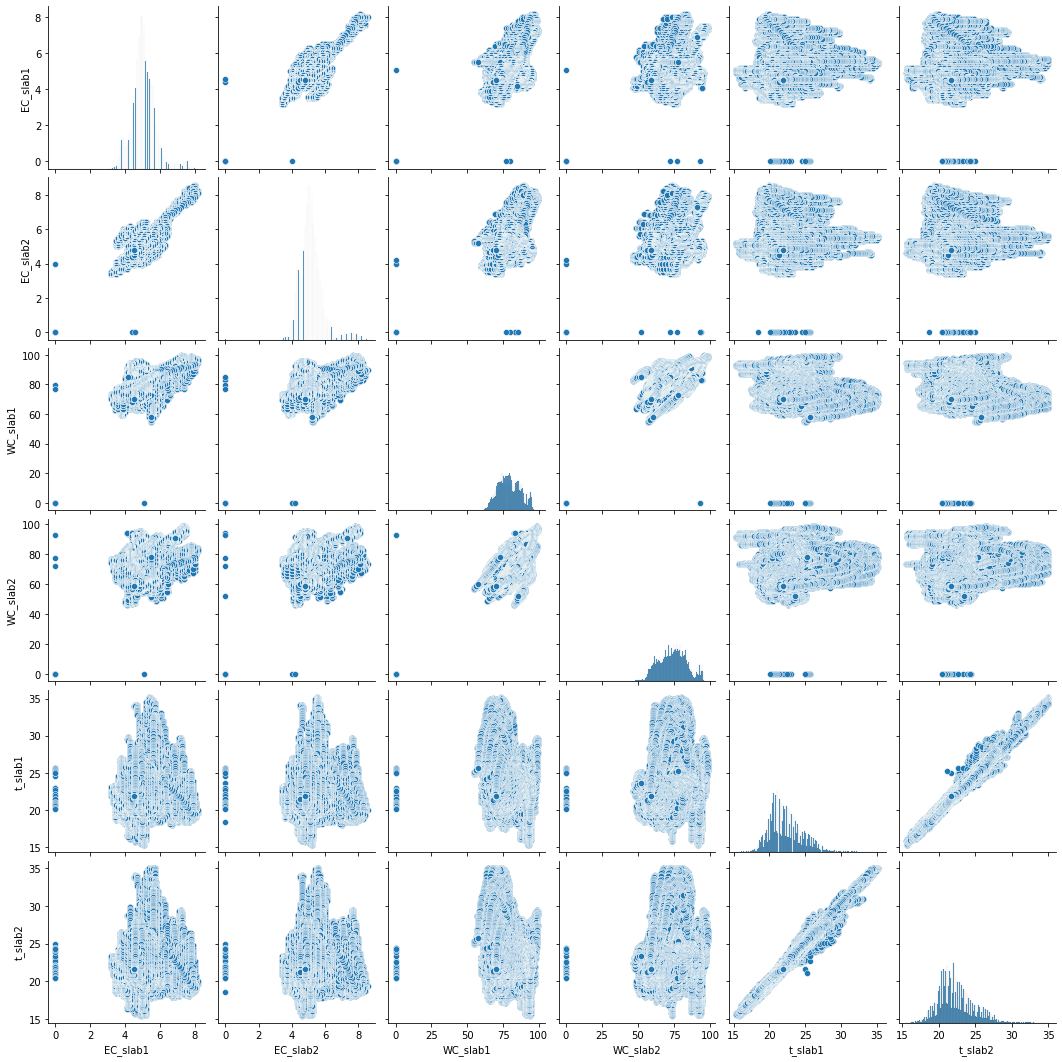

In [24]:
sns.pairplot(g_sens)

# Plotting Line Plot to analyze the data features with respect to time

<Figure size 720x432 with 0 Axes>

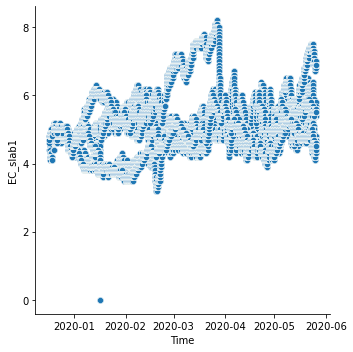

<Figure size 720x432 with 0 Axes>

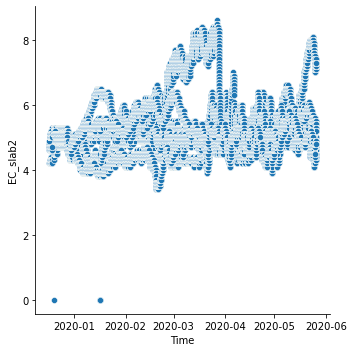

<Figure size 720x432 with 0 Axes>

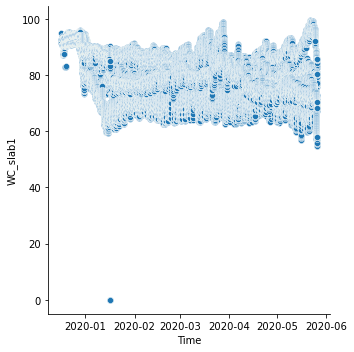

<Figure size 720x432 with 0 Axes>

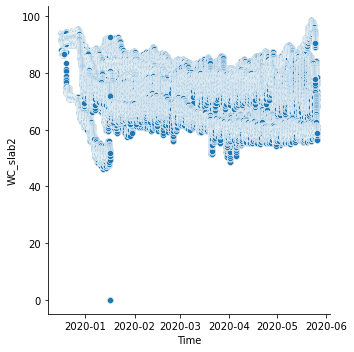

<Figure size 720x432 with 0 Axes>

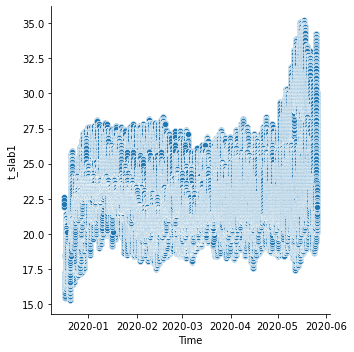

<Figure size 720x432 with 0 Axes>

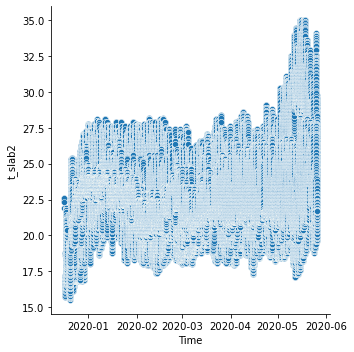

In [25]:
for col in ['EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1', 't_slab2']:
    plt.figure(figsize=(10,6))
    sns.relplot(data=g_sens, x='Time', y=col)
    